In [2]:
"""
copyright: abhirup.ghosh.184098@gmail.com
"""

# dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from matplotlib.gridspec import GridSpec
import geopandas as gpd

import matplotlib as mpl
import seaborn as sns

import matplotlib.image as mpimg
import imageio

plt.style.use('ggplot')
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams["savefig.facecolor"] = mpl.rcParams["axes.facecolor"]
import os


In [56]:
# reference: https://juanitorduz.github.io/germany_plots/

# Make sure you read postal codes as strings, otherwise 
# the postal code 01110 will be parsed as the number 1110. 
plz_shape_df = gpd.read_file('../../../emmy/projects/head_data/plz-5stellig.shp/plz-5stellig.shp', dtype={'plz': str})
plz_shape_df.head()

plz_region_df = pd.read_csv(
    '../../../emmy/projects/head_data/zuordnung_plz_ort.csv', 
    sep=',', 
    dtype={'plz': str}
)

plz_region_df.drop('osm_id', axis=1, inplace=True)

plz_region_df.head()

# Merge data.
germany_df = pd.merge(
    left=plz_shape_df, 
    right=plz_region_df, 
    on='plz',
    how='inner'
)

germany_df.drop(['note'], axis=1, inplace=True)

germany_df.head()

,plz,einwohner,qkm,geometry,ags,ort,landkreis,bundesland
0,81248,121,1.984763,"POLYGON ((11.39468 48.14729, 11.39490 48.14780...",9162000,München,NaN,Bayern
1,60315,0,0.017481,"POLYGON ((8.67254 50.11264, 8.67259 50.11264, ...",6412000,Frankfurt am Main,NaN,Hessen
2,24988,3350,36.491463,"POLYGON ((9.36585 54.69994, 9.36683 54.70014, ...",1059184,Oeversee,Kreis Schleswig-Flensburg,Schleswig-Holstein
3,93185,1786,32.873844,"POLYGON ((12.47666 49.13598, 12.47702 49.13637...",9372142,Michelsneukirchen,Landkreis Cham,Bayern
4,93489,2622,38.597260,"POLYGON ((12.54904 49.19318, 12.54953 49.19371...",9372158,Schorndorf,Landkreis Cham,Bayern


# Custom color map: Germany

In [82]:
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

colors = ["000000","400000","800000","ff0000","ff3400","ff9b00","ffce00","ffffcc"]
colors = [f"#{color}" for color in colors][::-1]
cmap_name = 'my_list'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

(5.4075345200000005, 15.50071168, 46.880682799999995, 55.448112)

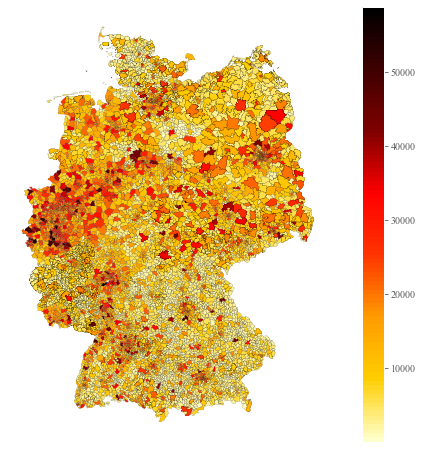

In [83]:
fig, ax = plt.subplots(figsize=(12,8))

germany_df.plot(column='einwohner',
            ax=ax,
            legend=True,
            cmap=cmap,
            edgecolor='k',
            linewidth=0.1)
plt.axis('off') 

(5.4075345200000005, 15.50071168, 46.880682799999995, 55.448112)

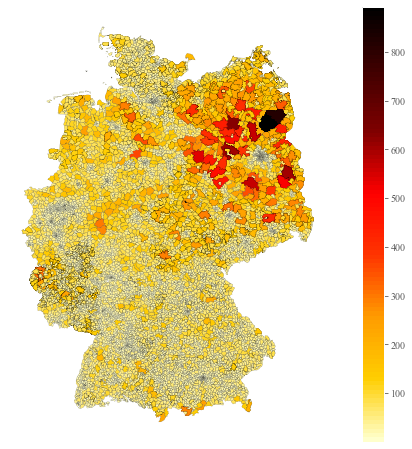

In [85]:
fig, ax = plt.subplots(figsize=(12,8))

germany_df.plot(column='qkm',
            ax=ax,
            legend=True,
            cmap=cmap,
            edgecolor='k',
            linewidth=0.1)
plt.axis('off') 

(5.4075345200000005, 15.50071168, 46.880682799999995, 55.448112)

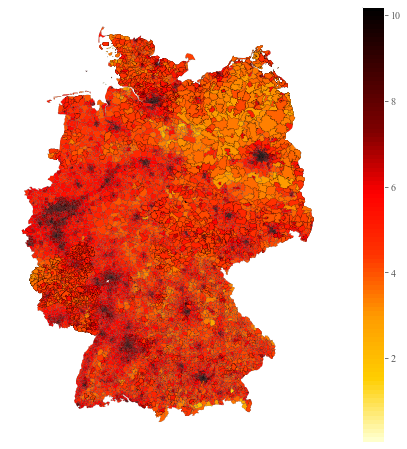

In [84]:
fig, ax = plt.subplots(figsize=(12,8))

germany_df.plot(column='einwohner_areanormalised',
            ax=ax,
            legend=True,
            cmap=cmap,
            edgecolor='k',
            linewidth=0.1)
plt.axis('off') 

In [57]:
germany_df['einwohner_areanormalised'] = np.log(germany_df.einwohner/germany_df.qkm)
germany_df = germany_df[germany_df['einwohner_areanormalised'] > 0]
germany_df.head()

/Users/abhirupghosh/opt/anaconda3/envs/mm22/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,plz,einwohner,qkm,geometry,ags,ort,landkreis,bundesland,einwohner_areanormalised
0,81248,121,1.984763,"POLYGON ((11.39468 48.14729, 11.39490 48.14780...",9162000,München,NaN,Bayern,4.110291
2,24988,3350,36.491463,"POLYGON ((9.36585 54.69994, 9.36683 54.70014, ...",1059184,Oeversee,Kreis Schleswig-Flensburg,Schleswig-Holstein,4.519637
3,93185,1786,32.873844,"POLYGON ((12.47666 49.13598, 12.47702 49.13637...",9372142,Michelsneukirchen,Landkreis Cham,Bayern,3.995056
4,93489,2622,38.597260,"POLYGON ((12.54904 49.19318, 12.54953 49.19371...",9372158,Schorndorf,Landkreis Cham,Bayern,4.218511
5,93494,2018,25.154035,"POLYGON ((12.62945 49.28007, 12.62949 49.28013...",9372168,Waffenbrunn,Landkreis Cham,Bayern,4.384844


(5.4075345200000005, 15.50071168, 46.880682799999995, 55.448112)

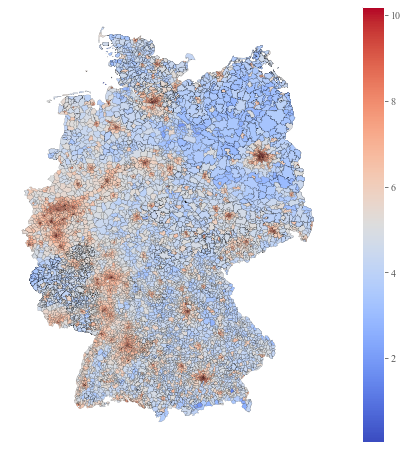

In [58]:
fig, ax = plt.subplots(figsize=(12,8))

germany_df.plot(column='einwohner_areanormalised',
            ax=ax,
            legend=True,
            cmap='coolwarm',
            edgecolor='k',
            linewidth=0.1)
plt.axis('off')            

In [93]:
berlin_df = germany_df.query('ort == "Berlin"')
berlin_df['einwohner_areanormalised'] = np.log10(berlin_df.einwohner/berlin_df.qkm)
berlin_df.head()

/Users/abhirupghosh/opt/anaconda3/envs/mm22/lib/python3.10/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,plz,einwohner,qkm,geometry,ags,ort,landkreis,bundesland,einwohner_areanormalised
5137,13599,13720,7.356835,"POLYGON ((13.20822 52.53647, 13.20866 52.53688...",11000000,Berlin,NaN,Berlin,3.270663
5138,13505,6368,10.459622,"POLYGON ((13.20820 52.59899, 13.21307 52.59909...",11000000,Berlin,NaN,Berlin,2.784487
5139,13595,19966,5.300625,"POLYGON ((13.17354 52.50851, 13.17399 52.50926...",11000000,Berlin,NaN,Berlin,3.575964
5140,10789,4131,0.449705,"POLYGON ((13.33073 52.49955, 13.33096 52.50091...",11000000,Berlin,NaN,Berlin,3.963127
5141,13597,8490,5.798557,"POLYGON ((13.19482 52.53862, 13.19487 52.53871...",11000000,Berlin,NaN,Berlin,3.165588


In [100]:
berlin_df.sort_values(by='einwohner_areanormalised', ascending=False)

,plz,einwohner,qkm,geometry,ags,ort,landkreis,bundesland,einwohner_areanormalised
5262,12047,13918,0.520911,"POLYGON ((13.42064 52.49562, 13.42097 52.49579...",11000000,Berlin,NaN,Berlin,4.426813
5266,12045,15523,0.673226,"POLYGON ((13.43023 52.48592, 13.43054 52.48616...",11000000,Berlin,NaN,Berlin,4.362815
5264,12053,15373,0.790739,"POLYGON ((13.42508 52.48198, 13.42550 52.48231...",11000000,Berlin,NaN,Berlin,4.288725
5259,12043,13585,0.714262,"POLYGON ((13.42426 52.48531, 13.42444 52.48530...",11000000,Berlin,NaN,Berlin,4.279202
5233,10437,27821,1.473569,"POLYGON ((13.39929 52.54894, 13.39995 52.54899...",11000000,Berlin,NaN,Berlin,4.276002
...,...,...,...,...,...,...,...,...,...
5198,12589,9236,21.480497,"POLYGON ((13.65676 52.43742, 13.66248 52.44738...",11000000,Berlin,NaN,Berlin,2.633440
5329,14109,10049,25.260350,"POLYGON ((13.08835 52.41963, 13.09584 52.42198...",11000000,Berlin,NaN,Berlin,2.599683
5301,12527,9425,26.245386,"POLYGON ((13.55431 52.42579, 13.55542 52.42590...",11000000,Berlin,NaN,Berlin,2.555228
5174,13159,1762,10.951815,"POLYGON ((13.36691 52.62544, 13.36697 52.62547...",11000000,Berlin,NaN,Berlin,2.206520


In [94]:
berlin_df.plz.nunique()

190

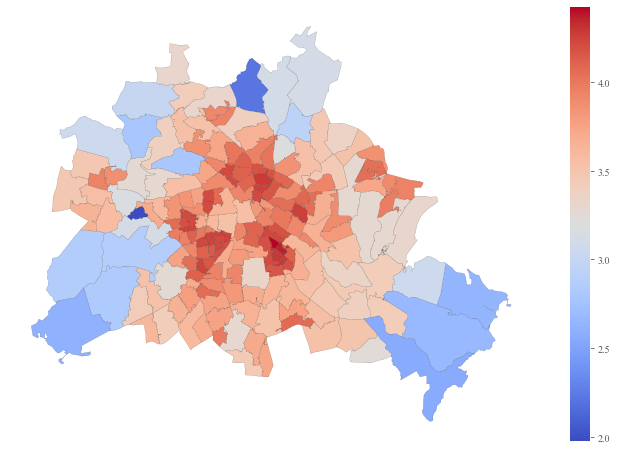

In [95]:
fig, ax = plt.subplots(figsize=(12,8))

berlin_df.plot(column='einwohner_areanormalised',
            ax=ax,
            legend=True,
            cmap='coolwarm',
            edgecolor='k',
            linewidth=0.1)
plt.axis('off')
plt.savefig('../plots/berlin_coolwarm.jpeg', dpi=300)       

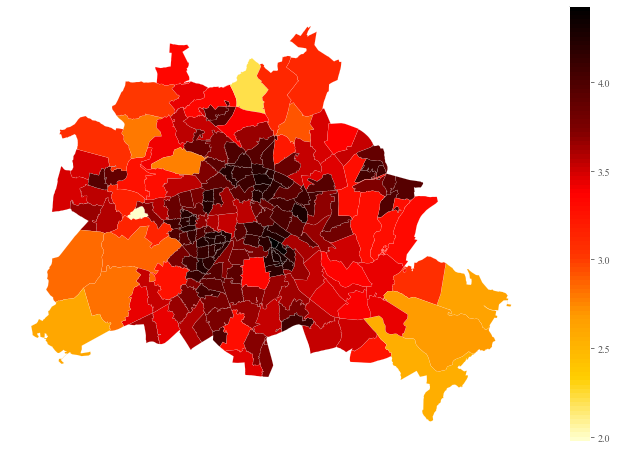

In [97]:
fig, ax = plt.subplots(figsize=(12,8))

berlin_df.plot(column='einwohner_areanormalised',
            ax=ax,
            legend=True,
            cmap=cmap,
            edgecolor='w',
            linewidth=0.1)
plt.axis('off')  
plt.savefig('../plots/berlin_mycmap.jpeg', dpi=300)                 

(13.054704205, 13.794801695, 52.321381605, 52.692371895)

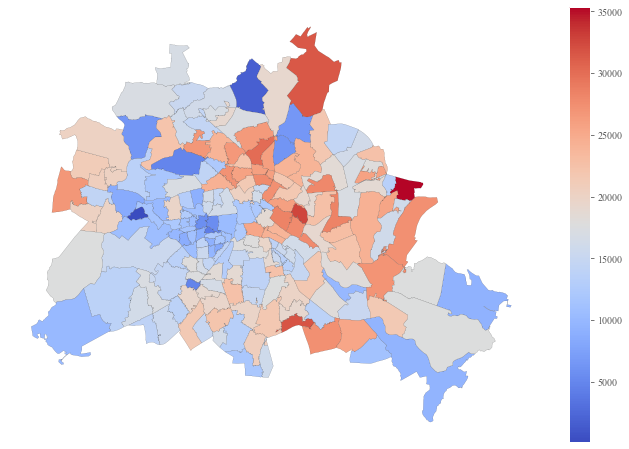

In [87]:
fig, ax = plt.subplots(figsize=(12,8))

berlin_df.plot(column='einwohner',
            ax=ax,
            legend=True,
            cmap='coolwarm',
            edgecolor='k',
            linewidth=0.1)
plt.axis('off')            

(13.054704205, 13.794801695, 52.321381605, 52.692371895)

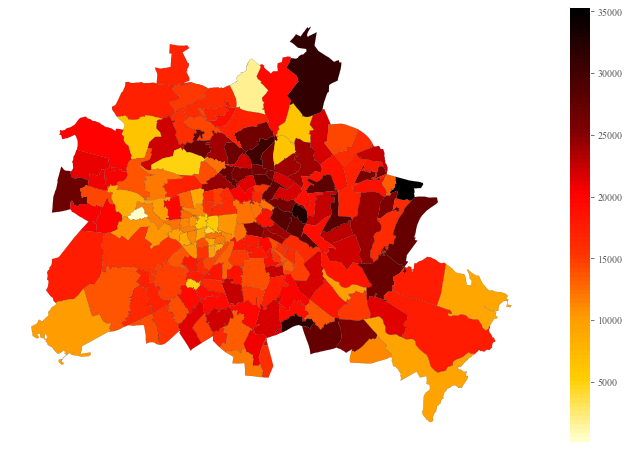

In [88]:
fig, ax = plt.subplots(figsize=(12,8))

berlin_df.plot(column='einwohner',
            ax=ax,
            legend=True,
            cmap=cmap,
            edgecolor='k',
            linewidth=0.1)
plt.axis('off')            

(13.054704205, 13.794801695, 52.321381605, 52.692371895)

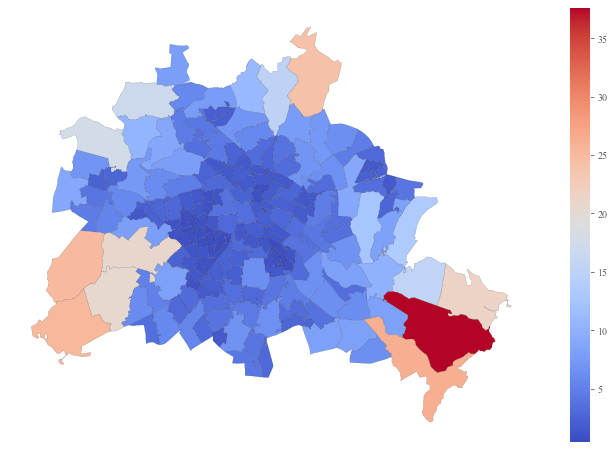

In [89]:
fig, ax = plt.subplots(figsize=(12,8))

berlin_df.plot(column='qkm',
            ax=ax,
            legend=True,
            cmap='coolwarm',
            edgecolor='k',
            linewidth=0.1)
plt.axis('off')            

(13.054704205, 13.794801695, 52.321381605, 52.692371895)

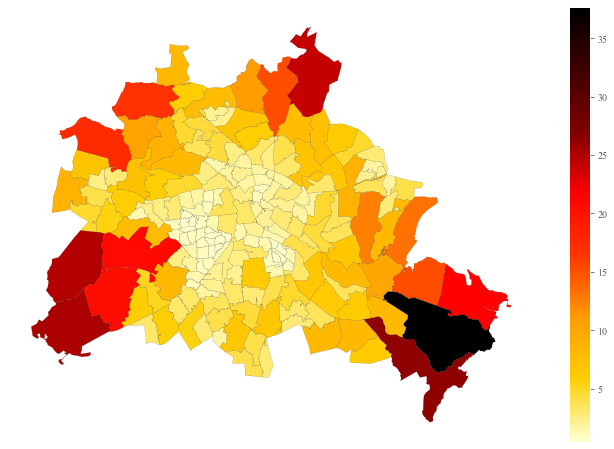

In [90]:
fig, ax = plt.subplots(figsize=(12,8))

berlin_df.plot(column='qkm',
            ax=ax,
            legend=True,
            cmap=cmap,
            edgecolor='k',
            linewidth=0.1)
plt.axis('off')            